In [5]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [6]:
midas_host = "http://127.0.0.1:5000"
midas_model = "dpt_hybrid_384"
midas_pgm_url = f"{midas_host}/depthpy/models/{midas_model}/pgm"

zoe_host = "http://127.0.0.1:5001"
zoe_pfm_url = f"{zoe_host}/zoeserver/pfm"

In [7]:
import os

targetdir = "../tmp"
targets = [os.path.join(targetdir, filename) for filename in os.listdir(targetdir) if any(map(filename.endswith, [".jpg", ".png"]))]
print(targets)

['../tmp\\argonian demastered.jpg']


../tmp\argonian demastered.jpg


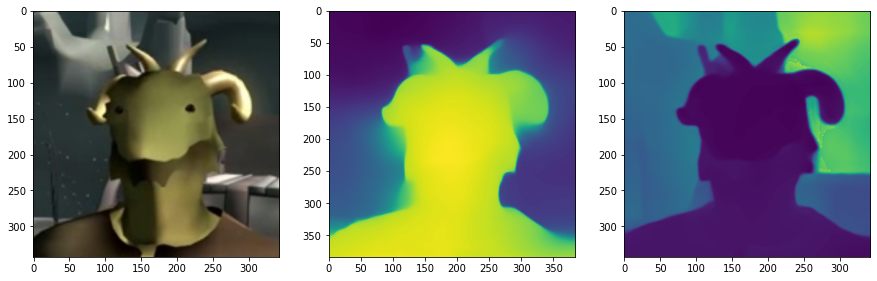

In [8]:
for target in targets:
	print(target)

	fig, axs = plt.subplots(1, 3, figsize=(15, 30))

	orig = cv2.imread(target)
	axs[0].imshow(orig[..., ::-1])

	with open(target, "rb") as fin:
		data = fin.read()

	for i, url in zip([1, 2], [midas_pgm_url, zoe_pfm_url]):
		res = requests.post(url, data=data)
		res = res.content

		res = np.frombuffer(res, np.uint8)
		res = cv2.imdecode(res, cv2.IMREAD_UNCHANGED)

		axs[i].imshow(res)

	plt.show()